In [51]:
#Import Libraries that are needed 
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.utils import shuffle
import matplotlib 
import matplotlib.pyplot as plt

In [52]:
#Import the dataset
df=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [53]:
#Display the dataset the will be use
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [37]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
New_Cabin     0
Family        0
Individual    0
dtype: int64

In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

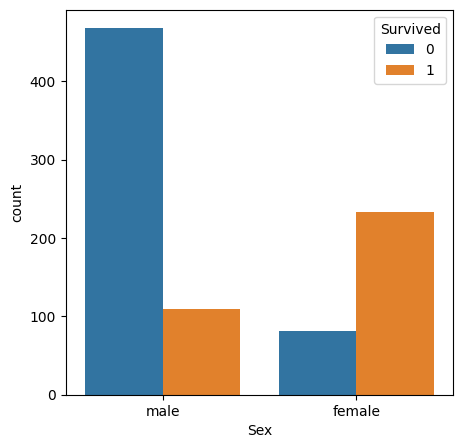

In [55]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

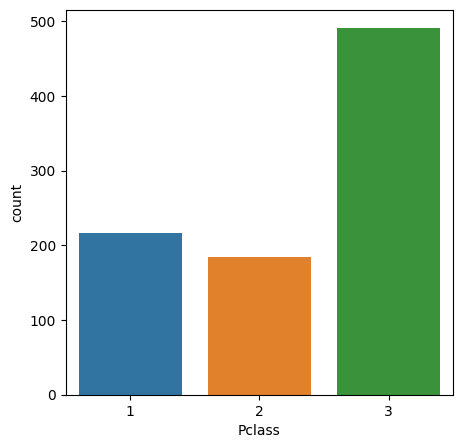

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

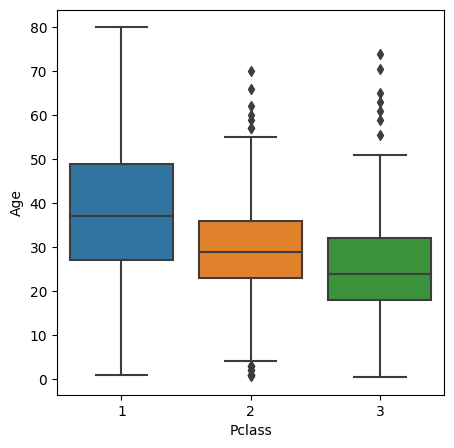

In [57]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Pclass', y='Age')

In [58]:
def fit(cols):
    Pclass = cols[1]
    Age = cols[0]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 22
    else:
        return Age

In [59]:
df['Age']=df[['Age','Pclass']].apply(fit, axis=1)

In [60]:
df.Embarked.fillna("Z", inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [62]:
df['Embarked'].unique()

array(['S', 'C', 'Q', 'Z'], dtype=object)

In [64]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [65]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [66]:
import re
New_Cabin = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "Z":8}
dataset = [df, data_test]

for data in dataset:
    data['Cabin']= data['Cabin'].fillna("Z")
    data['New_Cabin']= data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    data['New_Cabin']= data['New_Cabin'].map(New_Cabin)
    data['New_Cabin']= data['New_Cabin'].fillna(0)

In [67]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z,S,8.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z,S,8.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z,S,8.0


In [68]:
dataset = [df, data_test]
for data in dataset:
    data['Family'] = data['Parch'] + data['SibSp'] 
    data.loc[data['Family'] ==0,'Individual'] =1
    data.loc[data['Family'] > 0,'Individual'] =0

In [69]:
# Replacing the value
Sex = {'male': 1,'female': 0}

# Replacing the value of  Embarked to Numerical
Embarked = {'C':0,'Q':1,'S':3,'Z':4}

In [70]:
df['Sex'].replace(Sex, inplace=True)

# Replacing the value of  Embarked to Numerical
df['Embarked'].replace(Embarked, inplace=True)

In [71]:
df=df.dropna(subset=['Embarked'])

In [72]:
df['Age'] = df['Age'].apply(np.int64)
df['Fare'] = df['Fare'].apply(np.int64)
df['Embarked'] = df['Embarked'].apply(np.int64)

In [73]:
df=df.drop(columns=["PassengerId","Name","Cabin","Ticket"],axis=1)

In [74]:
# Printing data, ALl NaN has been replaced
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    int64  
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    int64  
 7   Embarked    891 non-null    int64  
 8   New_Cabin   891 non-null    float64
 9   Family      891 non-null    int64  
 10  Individual  891 non-null    float64
dtypes: float64(2), int64(9)
memory usage: 76.7 KB
None


In [75]:
X_train= df.drop("Survived", axis=1)
y_train = df['Survived'] # Survive

In [76]:
# Accuracy
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

ln=linear_model.LogisticRegression(max_iter=3000)
ln.fit(X_train, y_train)
round(ln.score(X_train, y_train) * 100,2)

81.03

In [77]:
# Accuracy of Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
round(rf.score(X_train, y_train) * 100,2)

97.08

In [ ]:
#Conclusion and recommendations - 